In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('loan_features.csv')

In [2]:
#xgboost, class weight
#top features
#shap
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE 
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
ss = StandardScaler()
y= df.STATUS
X = df.drop('STATUS',axis = 1)
sm = SMOTE(random_state=0,sampling_strategy=.5)
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)
X_train, y_train = sm.fit_resample(X_train, y_train)
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)
xgb = XGBClassifier(random_state=0);
xgb.fit(X_train, y_train)
rf = RandomForestClassifier(random_state = 0) 
rf.fit(X_train, y_train);

/Users/k.krieg/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:44:22] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


              precision    recall  f1-score   support

    Unfunded       0.04      0.29      0.07     20993
      Funded       0.95      0.68      0.79    430228

    accuracy                           0.66    451221
   macro avg       0.50      0.49      0.43    451221
weighted avg       0.91      0.66      0.76    451221



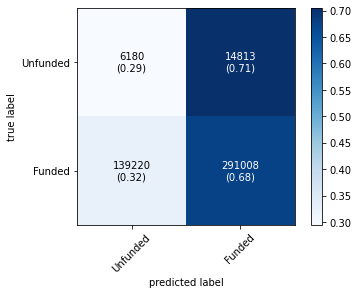

In [3]:
#RF Model Assessment
target_names = ['Unfunded','Funded']
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))
cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)
figure, ax = plot_confusion_matrix(conf_mat = cm,
                                   show_absolute = True,
                                   class_names = target_names,

                                   show_normed = True,
                                   colorbar = True)

              precision    recall  f1-score   support

    Unfunded       0.03      0.08      0.04     20993
      Funded       0.95      0.86      0.90    430228

    accuracy                           0.83    451221
   macro avg       0.49      0.47      0.47    451221
weighted avg       0.91      0.83      0.86    451221



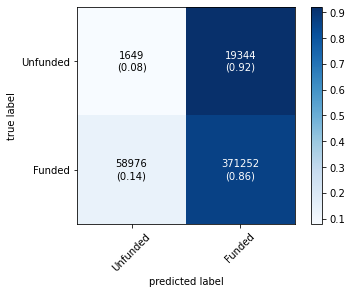

In [4]:
#XGBoost Model Assessment
target_names = ['Unfunded','Funded']
y_pred = xgb.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))
cm = confusion_matrix(y_test, y_pred, labels=xgb.classes_)
figure, ax = plot_confusion_matrix(conf_mat = cm,
                                   show_absolute = True,
                                   class_names = target_names,

                                   show_normed = True,
                                   colorbar = True)

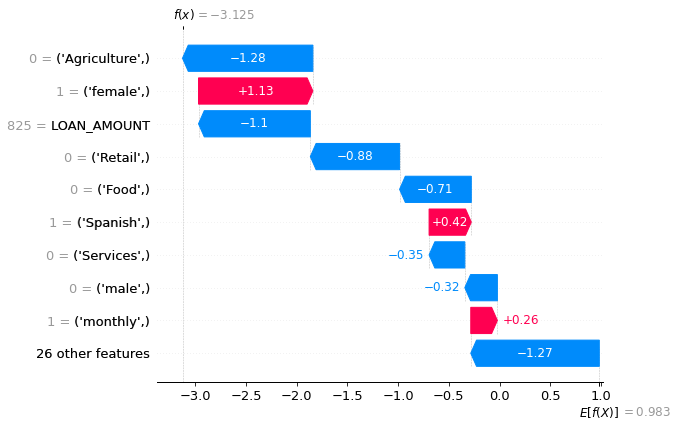

In [5]:
import shap
explainer = shap.Explainer(xgb)
shap_values = explainer(X)
shap.plots.waterfall(shap_values[0])

In [ ]:
explainer = shap.Explainer(rf)
shap_values = explainer(X)
shap.plots.waterfall(shap_values[0])